In [52]:
!pip install scikit-plot

In [53]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix
file='D:/Downloads/archive (1)/spam.csv'

In [54]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [55]:
df = pd.read_csv(file,encoding='Windows-1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [56]:
df.shape

(5572, 5)

# DATA CLEANING

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [58]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [60]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [61]:
df.rename(columns={df.columns.tolist()[0]:'target',df.columns.tolist()[1]:'mail'},inplace=True)

In [62]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [63]:
df['target'] = encoder.fit_transform(df['target'])

In [64]:
df.head()

,target,mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [65]:
# missing values
df.isnull().sum()

target    0
mail      0
dtype: int64

In [66]:
#check for duplicate values
df.duplicated().sum()

403

In [67]:
#removal of duplictes
df= df.drop_duplicates(keep='first')

In [68]:
df.duplicated().sum()

0

# EDA

In [69]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int32 
 1   mail    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


([<matplotlib.patches.Wedge at 0x1924e153af0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

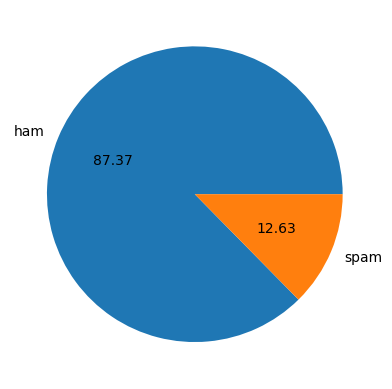

In [71]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')

In [72]:
!pip install nltk

In [73]:
# data is imbalanced
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:
# number of charecters
df['num_charecters'] = df['mail'].apply(len)

In [75]:
df.head()

,target,mail,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [76]:
# number of words
df['num_words']=df['mail'].apply(lambda x:len(nltk.word_tokenize(x)))

In [77]:
# number of sentences
df['num_sentences']=df['mail'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [78]:
df.head()

,target,mail,num_charecters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [79]:
df[['num_words','num_charecters','num_sentences']].describe()

,num_words,num_charecters,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,18.453279,78.977945,1.947185
std,13.324793,58.236293,1.362406
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,60.000000,1.000000
75%,26.000000,117.000000,2.000000
max,220.000000,910.000000,28.000000


In [80]:
#ham
df[df['target']==0][['num_words','num_charecters','num_sentences']].describe()

,num_words,num_charecters,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,17.120903,70.459256,1.799601
std,13.493725,56.358207,1.278465
min,1.000000,2.000000,1.000000
25%,8.000000,34.000000,1.000000
50%,13.000000,52.000000,1.000000
75%,22.000000,90.000000,2.000000
max,220.000000,910.000000,28.000000


In [81]:
#spam
df[df['target']==1][['num_words','num_charecters','num_sentences']].describe()

,num_words,num_charecters,num_sentences
count,653.000000,653.000000,653.000000
mean,27.667688,137.891271,2.967841
std,7.008418,30.137753,1.483201
min,2.000000,13.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,149.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,224.000000,8.000000


<Axes: xlabel='num_charecters', ylabel='Count'>

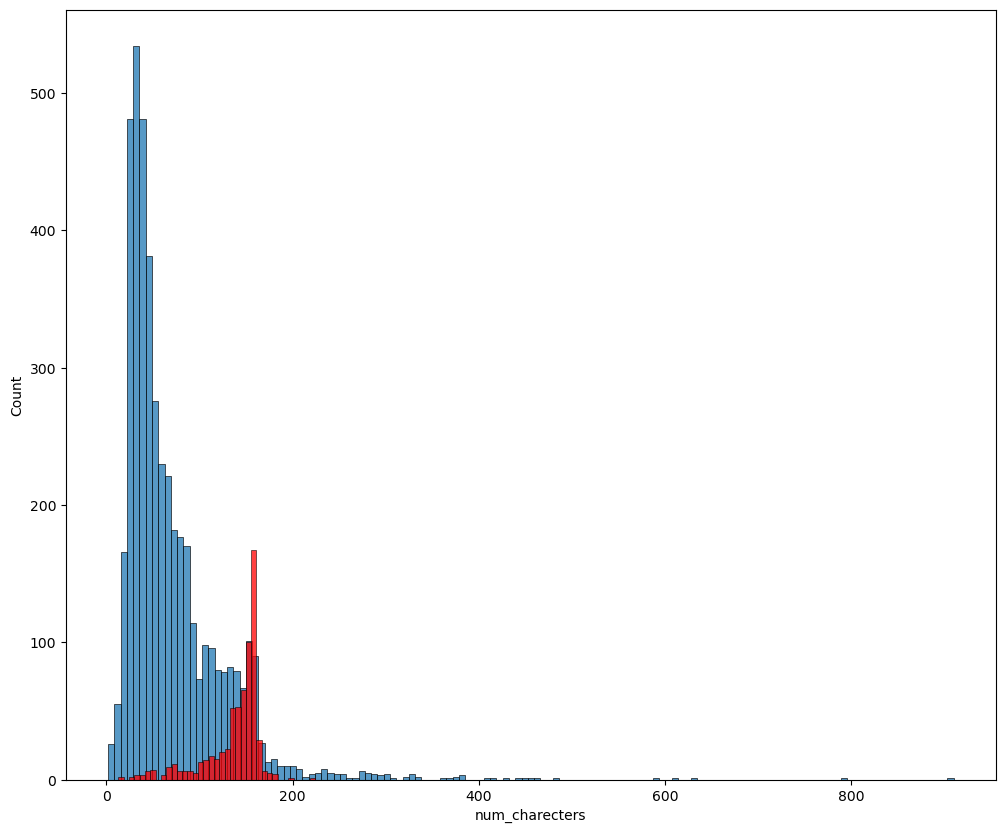

In [82]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.histplot(df[df['target']==0]['num_charecters'])
sns.histplot(df[df['target']==1]['num_charecters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

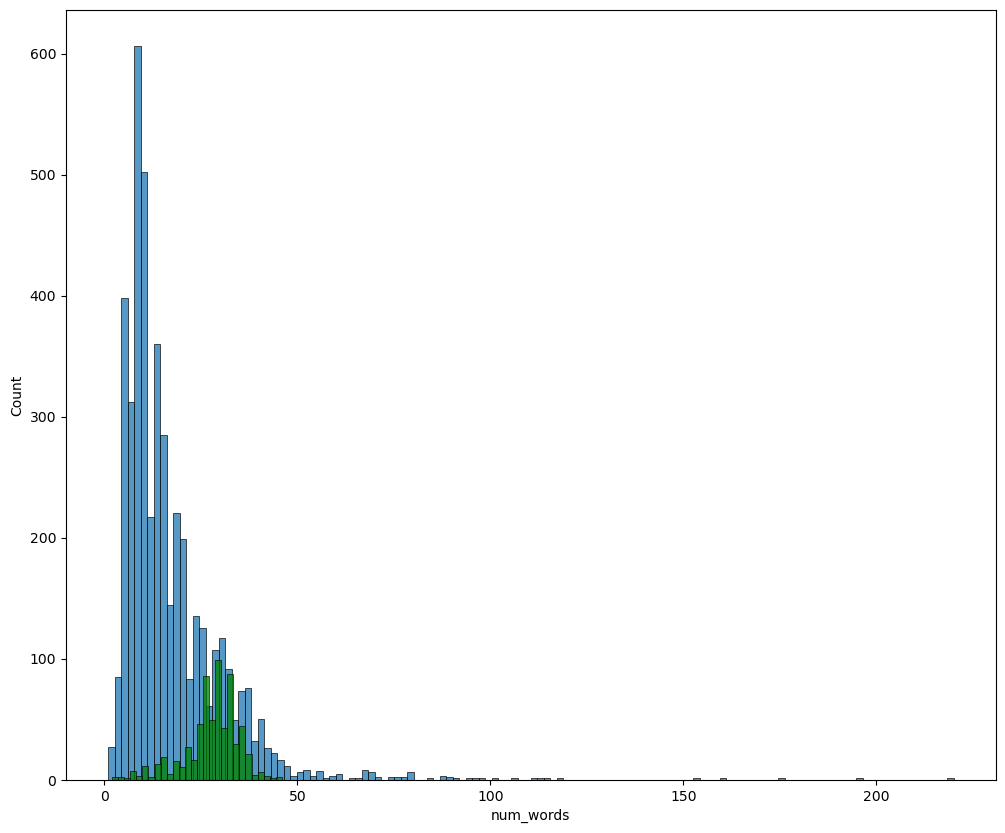

In [83]:
plt.figure(figsize=(12,10))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='green')

<Axes: xlabel='num_sentences', ylabel='Count'>

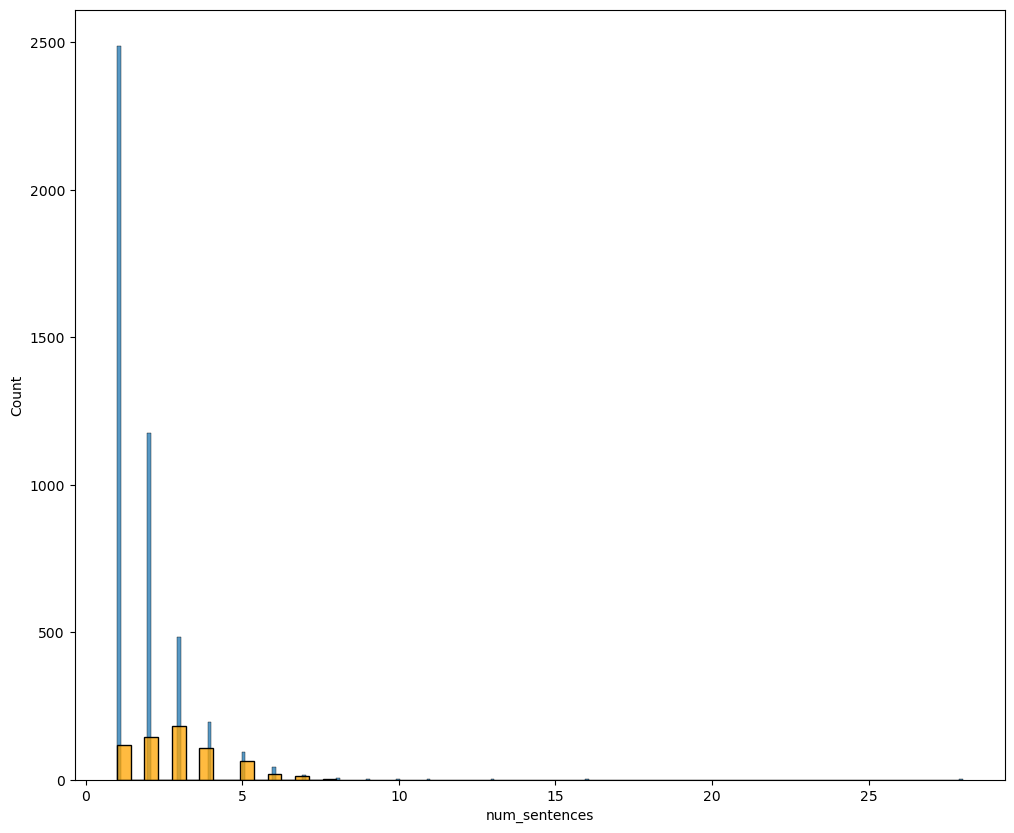

In [84]:
plt.figure(figsize=(12,10))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='orange')

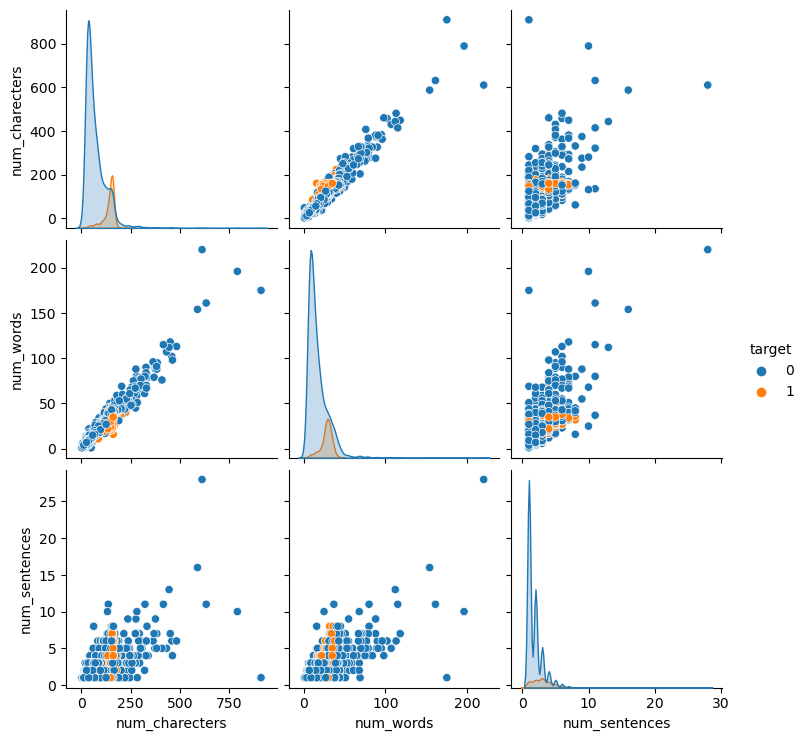

In [85]:
sns.pairplot(df,hue='target')

C:\Users\USER\AppData\Local\Temp\ipykernel_19968\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

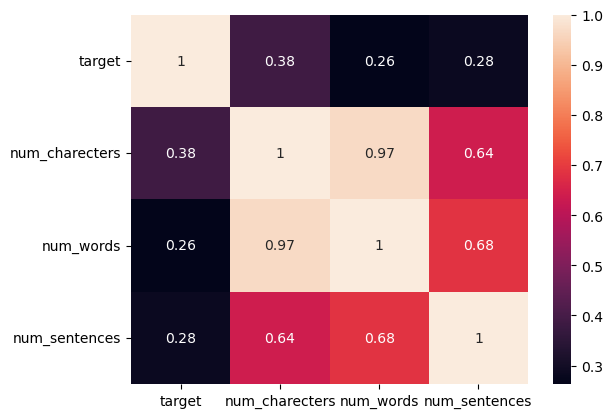

In [86]:
sns.heatmap(df.corr(),annot=True)

# MODEL TRAINING USING MULTINOMIAL NAIVE BAYES

In [87]:
X_train, X_test, y_train, y_test = tts(df['mail'], df['target'], test_size=0.2, random_state=1)
     

In [88]:
count_vector = CountVectorizer()
train_data = count_vector.fit_transform(X_train)
test_data = count_vector.transform(X_test)

In [89]:
Mnb = MultinomialNB()
Mnb.fit(train_data, y_train)
     

MultinomialNB()

In [90]:
#PREDICTION IS DONE
MnbPredicts = Mnb.predict(test_data)

In [91]:
print("The accuracy of our Naïve Bayes multinomial model is {} %".format(accuracy_score(y_test, MnbPredicts) * 100))
print("The Precision of our Naïve Bayes multinomial model is {} %". format(precision_score(y_test, MnbPredicts)* 100))
print("The Recall of our Naïve Bayes multinomial model is {} %" . format(recall_score(y_test, MnbPredicts)* 100))

The accuracy of our Naïve Bayes multinomial model is 97.96905222437138 %
The Precision of our Naïve Bayes multinomial model is 95.23809523809523 %
The Recall of our Naïve Bayes multinomial model is 88.88888888888889 %


The accuracy of Naive Bayes clasifier is 97.96905222437138%

 [[893   6]
 [ 15 120]]


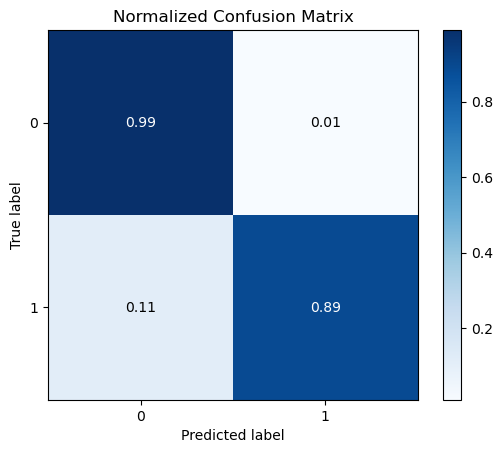

In [104]:
confusionmatrix = confusion_matrix(y_test, MnbPredicts)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy_score(y_test, MnbPredicts) * 100))
print("\n", confusionmatrix)
skplt.metrics.plot_confusion_matrix(y_test, MnbPredicts, normalize = True)
plt.show()

# NOW THE MODEL IS TESTED-IF THE OUTPUT COMES OUT TO BE 1,THEN THE INPUT MESSAGE IS SPAM AND IF THE OUTPUT IS 0 THEN IT IS HAM

In [94]:
new_test_sample_ham = ["Hi, I'm Tanushka nice to meet you."]

In [95]:
new_test_sample_spam= ["Congratulations, you've won a free Nokia phone."]

In [96]:
test_sample=["free calls award"]

In [97]:
test_sample_vectorized = count_vector.transform(test_sample)

In [98]:
new_test_sample_ham_vectorized = count_vector.transform(new_test_sample_ham)

In [99]:
new_test_sample_spam_vectorized = count_vector.transform(new_test_sample_spam)

In [100]:
sample_predict = Mnb.predict(new_test_sample_ham_vectorized)
sample_predict

array([0])

In [103]:
sample_predict = Mnb.predict(test_sample_vectorized)
sample_predict

array([1])

In [102]:
sample_predict = Mnb.predict(new_test_sample_spam_vectorized)
sample_predict

array([1])